<a href="https://colab.research.google.com/github/Munna-Prasad-Gupta/ML/blob/main/ass2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [10]:
# nA1

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

purchase_data = pd.read_excel('Lab Session Data.xlsx' , sheet_name='Purchase data')



A = purchase_data.iloc[:,1:4].values
C = purchase_data.iloc[:,4].values

# Dimensionality of Vector space

dimensionality = A.shape[1]

num_vectors = A.shape[0]

rank_A = np.linalg.matrix_rank(A)

# pseudo inverse of A

A_pinv = np.linalg.pinv(A)

# Cost of each product
product_costs = A_pinv.dot(C)


# Output the results
print(f"Dimensionality of the vector space: {dimensionality}")
print(f"Number of vectors in the vector space: {num_vectors}")
print(f"Rank of Matrix A: {rank_A}")
print("Cost of each product:", product_costs)

[ 1. 55. 18.]
Dimensionality of the vector space: 3
Number of vectors in the vector space: 10
Rank of Matrix A: 3
Cost of each product: [ 1. 55. 18.]


In [12]:
# A2

# Model vector X

X = A_pinv.dot(C)
X

array([ 1., 55., 18.])

In [15]:
# A3

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,classification_report

purchase_data['Classification']=np.where(purchase_data['Payment (Rs)'] > 200 ,'RICH','POOR')


M = purchase_data.iloc[:,1:4].values
N = purchase_data['Classification'].values

M_train, M_test, N_train, N_test = train_test_split(M, N, test_size=0.4, random_state=42)

classifier = LogisticRegression()
classifier.fit(M_train, N_train)

N_pred = classifier.predict(M_test)

accuracy = accuracy_score(N_test, N_pred)
classification_rep = classification_report(N_test, N_pred)

print(f"Accuracy: {accuracy}")
print("Classification Report:")
print(classification_rep)

Accuracy: 0.75
Classification Report:
              precision    recall  f1-score   support

        POOR       0.67      1.00      0.80         2
        RICH       1.00      0.50      0.67         2

    accuracy                           0.75         4
   macro avg       0.83      0.75      0.73         4
weighted avg       0.83      0.75      0.73         4



In [33]:
# A4

import pandas as pd
import numpy as np
import statistics
import matplotlib.pyplot as plt

stock_data = pd.read_excel('Lab Session Data.xlsx',sheet_name='IRCTC Stock Price')


mean = statistics.mean(stock_data['Price'])
variance = statistics.variance(stock_data['Price'])

wed_data = stock_data['Day'] =='Wed'
wed_data_values = stock_data[wed_data]

wed_data_mean = statistics.mean(wed_data_values['Price'])

print(f"The wed data mean is {wed_data_mean} and pop mean is {mean}")

april_data = stock_data['Month'] == 'Apr'
april_data_values = stock_data[april_data]

april_data_mean = statistics.mean(april_data_values['Price'])


print(f"The april data mean is {april_data_mean} and pop mean is {mean}")



The wed data mean is 1550.706 and pop mean is 1560.663453815261
The april data mean is 1698.9526315789474 and pop mean is 1560.663453815261


In [45]:
chg_data = stock_data['Chg%'].apply(lambda x: float(x.strip('%')) if isinstance(x, str) else x)

chg_loss_data = chg_data < 0
chg_loss_data_values = chg_data[chg_loss_data]

prob_loss = len(chg_loss_data_values) / len(chg_data)

print(f"The probability of loss is {prob_loss}")


wed_data_chg = wed_data_values['Chg%'].apply(lambda x: float(x.strip('%')) if isinstance(x, str) else x)
wed_data_profit_chg = wed_data_chg > 0
wed_data_profit_chg_values = wed_data_chg[wed_data_profit_chg]

prob_profit_wed = len(wed_data_profit_chg_values)/len(wed_data_chg)

print(f"The probability of profit on Wednesday is {prob_profit_wed}")

prob_of_wed = len(stock_data[stock_data['Day'] == 'Wed'])/len(stock_data)

prob_of_profit_given_wed = prob_profit_wed/prob_of_wed

print(f"The probability of profit given today is Wednesday is {prob_of_profit_given_wed}")




The probability of loss is 0.4979919678714859
The probability of profit on Wednesday is 0.42
The probability of profit given today is Wednesday is 2.0916


ValueError: setting an array element with a sequence. The requested array has an inhomogeneous shape after 1 dimensions. The detected shape was (5,) + inhomogeneous part.

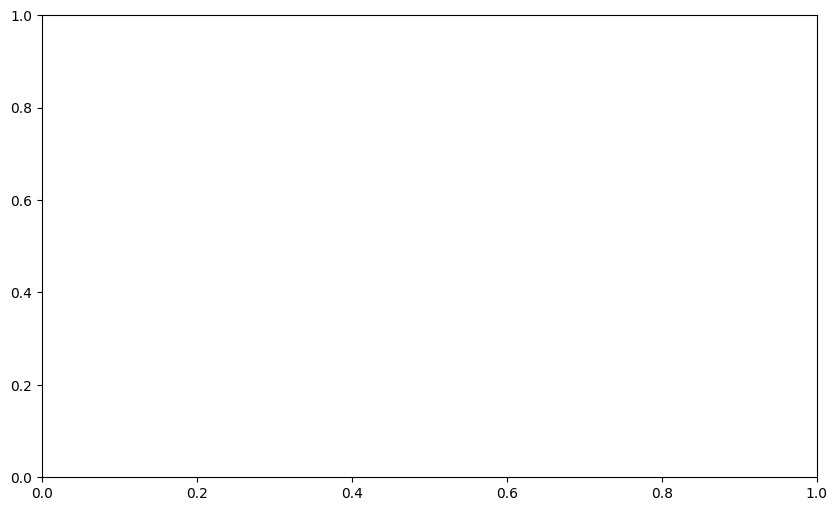

In [49]:
#scatter plot
import matplotlib.pyplot as plt

days_of_week =['Mon','Tue','Wed','Thu','Fri']
chg_by_day = [chg_data[stock_data['Day'] == day ] for day in days_of_week]

plt.figure(figsize=(10,6))
plt.plot(chg_by_day,days_of_week)
plt.xlabel('Day of the Week')
plt.ylabel('Chg%')
plt.title('Chg% by Day of the Week')
plt.show()
